## Simple Moving Average

Let's import the basics first.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set_style('darkgrid')

import pandas_datareader as pdr

In [4]:
ticker = input('Please input the ticker you want to look at: ').upper()
# upper() function to capitalise

start = '2017-01-01'
end = '2021-01-01'

data = pdr.DataReader(ticker, 'yahoo', start, end)['Adj Close']
volume = pdr.DataReader(ticker, 'yahoo', start, end)['Volume']

Please input the ticker you want to look at:  jpm


Let's say we want to look at the 10, 30, and 50 day moving average of the asset:

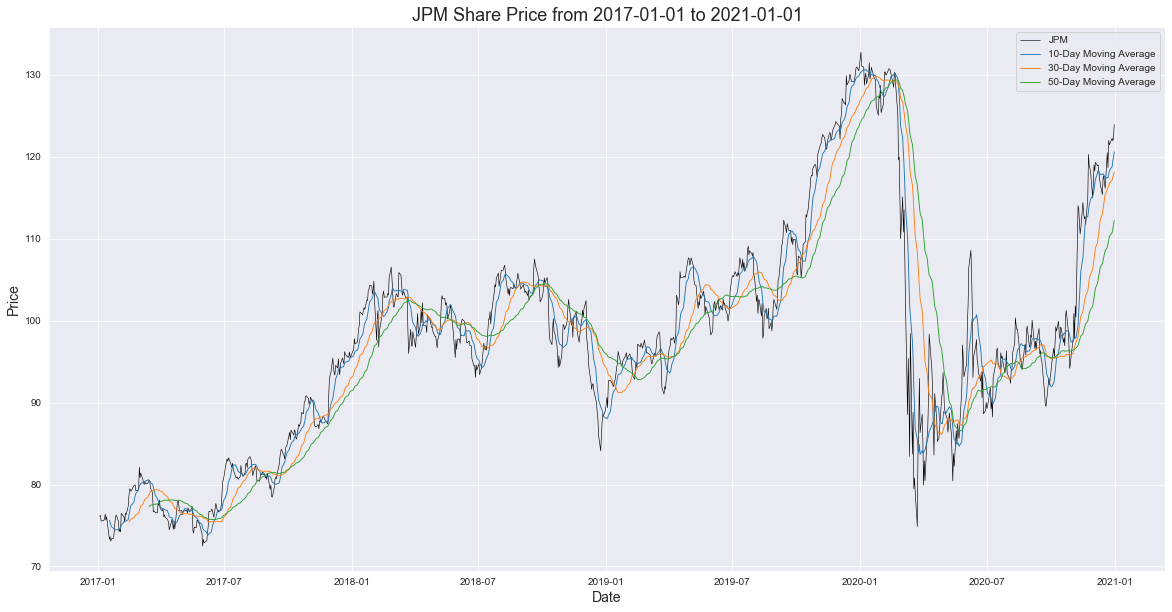

In [5]:
ma = [10, 30, 50]
# We put them in a list so that they can be looped and we don't have to write the same line of code 4 times

sma_df = pd.DataFrame()
for x in ma:
    sma_df[f'{x}-Day Moving Average'] = data.rolling(window=x).mean()
    # The rolling function is the moving function that gets the data between for a certain period (window) of time.
    # The window parameter is the rolling timeframe.
    # We then take the average using the mean() function, which is why it is at the end.

plt.figure(figsize=(20,10))
plt.plot(data, lw=0.6, label = ticker, color='k')
# k for color commonly denotes black
for x in ma:
    plt.plot(sma_df[f'{x}-Day Moving Average'], label = f'{x}-Day Moving Average', alpha=1, lw=0.9)
    # We use a for loop here to get the labels to show on the legend
plt.title(f'{ticker} Share Price from {start} to {end}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show();

The simple moving average is the most basic of the basic "algorithm trading" strategy that many people on instagram sell to you - and this is just that: 1 line of code.

To make ours slightly more sophisticated, let's add in the buy/sell signals.

In [6]:
def sma_buysell(data, dataframe):
    signal_buy_price = []
    signal_sell_price = []
    # To store our buy and sell signals
    
    flag = -1
    # The current state of our account/position
    
    for i in range(0, len(data)):
                
        if dataframe[f'{ma[0]}-Day Moving Average'][i] > dataframe[f'{ma[1]}-Day Moving Average'][i] and dataframe[f'{ma[1]}-Day Moving Average'][i] > dataframe[f'{ma[2]}-Day Moving Average'][i] and flag !=1:
            signal_buy_price.append(data[i])
            signal_sell_price.append(np.nan)
            flag = 1
            # This activates if the 10 day moving average is greater than the 30 moving average and 
            # if the 30 day moving average is greater than the 50 day moving average and if the flag
            # does not equal 1.
                                
        elif dataframe[f'{ma[0]}-Day Moving Average'][i] < dataframe[f'{ma[1]}-Day Moving Average'][i] and dataframe[f'{ma[1]}-Day Moving Average'][i] < dataframe[f'{ma[2]}-Day Moving Average'][i] and flag !=0:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(data[i])
            flag=0
            # This activates if the 10 day moving average is less than the 30 moving average and 
            # if the 30 day moving average is less than the 50 day moving average and if the flag
            # does not equal 0.
            
        else:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(np.nan)
            # Else we do nothing.
            
    return(signal_buy_price, signal_sell_price)

In [7]:
buy, sell = sma_buysell(data, sma_df)
sma_df['Buy Signal'] = buy
sma_df['Sell Signal'] = sell
sma_df

,10-Day Moving Average,30-Day Moving Average,50-Day Moving Average,Buy Signal,Sell Signal
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-24,118.270943,116.784928,110.285088,NaN,NaN
2020-12-28,118.834784,117.174153,110.745915,NaN,NaN
2020-12-29,119.489348,117.529561,111.204402,NaN,NaN


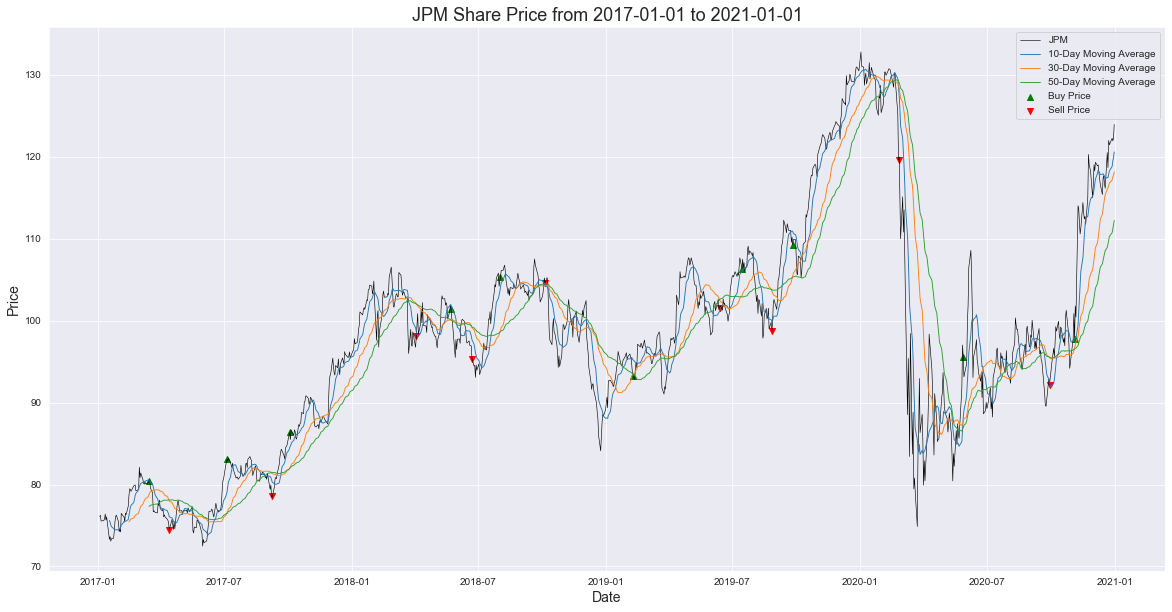

In [8]:
plt.figure(figsize=(20,10))
plt.plot(data, lw=0.6, label = ticker, color='k')
plt.scatter(sma_df.index, sma_df['Buy Signal'], color='green', marker='^', label='Buy Price')
plt.scatter(sma_df.index, sma_df['Sell Signal'], color='red', marker='v', label='Sell Price')
for x in ma:
    plt.plot(sma_df[f'{x}-Day Moving Average'], label = f'{x}-Day Moving Average', alpha=1, lw=0.9)
plt.title(f'{ticker} Share Price from {start} to {end}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show();

If we wanted to create an exponential moving average, we would simply do the same but change the rolling() function into ewm().
<br>
We will add this function in the final tutorial.
<br> 
See code below:

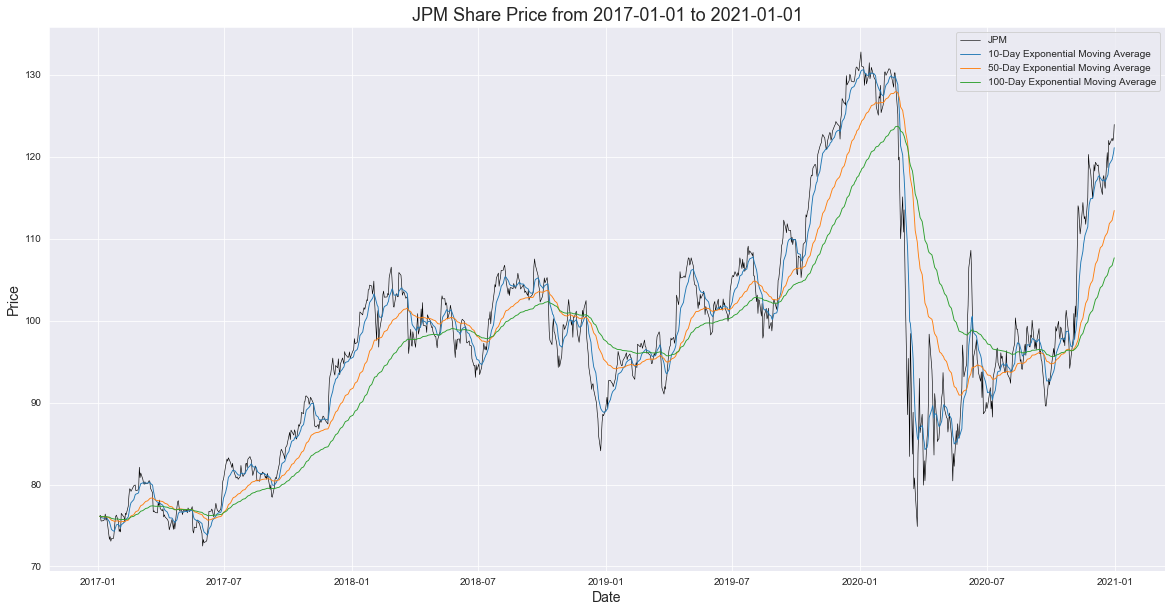

In [9]:
ma = [10, 50, 100]

EMA = pd.DataFrame()
for x in ma:
    EMA[f'{x}-Day EMA'] = data.ewm(span=x, adjust=False).mean()
    # The ewm() function is the exponential weighted moving function.
    # This works in the same way as the rolling function but it is exponentially weighted.
        # This just means the more recent data has a higher weighting and are a more significant factor
        # in determining the data for the next day.
    # The span is similar to the window parameter in the rolling function.
    
    # The adjust parameter is set to False as for this example we are not bothered with an imperfect balance of data
    # at the start of our sample.
    # If adjust was set to True (default) the function would try to adjust the weighting for the start of the data.

plt.figure(figsize=(20,10))
plt.plot(data, lw=0.6, label = ticker, color='k')
# k for color commonly denotes black
for x in ma:
    plt.plot(EMA[f'{x}-Day EMA'], label = f'{x}-Day Exponential Moving Average', alpha=1, lw=0.9)
    # We use a for loop here to get the labels to show on the legend
plt.title(f'{ticker} Share Price from {start} to {end}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show();

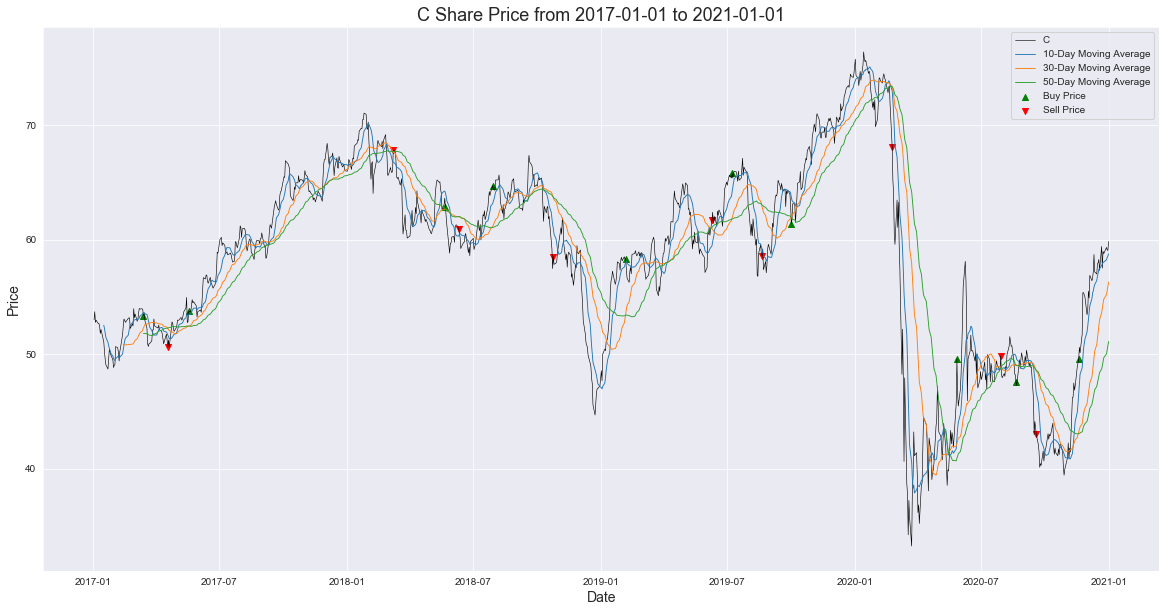

In [14]:
# In Summary

ma = [10, 30, 50]
sma_df = pd.DataFrame()
for x in ma:
    sma_df[f'{x}-Day Moving Average'] = data.rolling(window=x).mean()
    
def sma_buysell(data, dataframe):
    signal_buy_price = []
    signal_sell_price = []
    flag = -1
    for i in range(0, len(data)):
        if dataframe[f'{ma[0]}-Day Moving Average'][i] > dataframe[f'{ma[1]}-Day Moving Average'][i] and dataframe[f'{ma[1]}-Day Moving Average'][i] > dataframe[f'{ma[2]}-Day Moving Average'][i] and flag !=1:
            signal_buy_price.append(data[i])
            signal_sell_price.append(np.nan)
            flag = 1
        elif dataframe[f'{ma[0]}-Day Moving Average'][i] < dataframe[f'{ma[1]}-Day Moving Average'][i] and dataframe[f'{ma[1]}-Day Moving Average'][i] < dataframe[f'{ma[2]}-Day Moving Average'][i] and flag !=0:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(data[i])
            flag=0
        else:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(np.nan)
    return(signal_buy_price, signal_sell_price)

buy, sell = sma_buysell(data, sma_df)
sma_df['Buy Signal'] = buy
sma_df['Sell Signal'] = sell

plt.figure(figsize=(20,10))
plt.plot(data, lw=0.6, label = ticker, color='k')
plt.scatter(sma_df.index, sma_df['Buy Signal'], color='green', marker='^', label='Buy Price')
plt.scatter(sma_df.index, sma_df['Sell Signal'], color='red', marker='v', label='Sell Price')
for x in ma:
    plt.plot(sma_df[f'{x}-Day Moving Average'], label = f'{x}-Day Moving Average', alpha=1, lw=0.9)
plt.title(f'{ticker} Share Price from {start} to {end}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show();